In [5]:
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, transpile
import warnings
warnings.filterwarnings("ignore")


def increment(qc):
    qc.ccx(1, 2, 0)
    qc.cx(2, 1)
    return qc


def decrement(qc):
    qc.x(1)
    qc.x(2)
    qc.ccx(1, 2, 0)
    qc.x(1)
    qc.cx(2, 1)
    qc.x(2)
    return qc

def step(qc):
    qc = increment(qc)
    qc.barrier()
    qc = decrement(qc)
    qc.barrier()
    return qc


qc = QuantumCircuit(3, 1)
qc.h(2)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

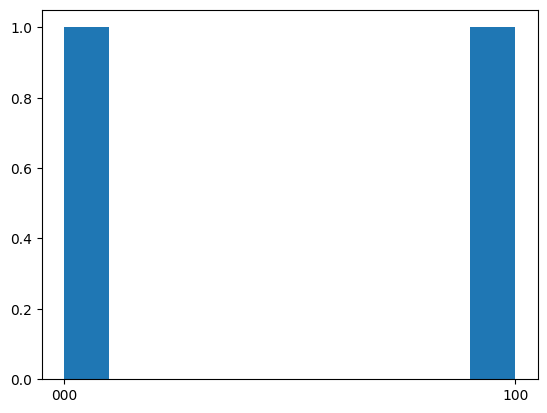

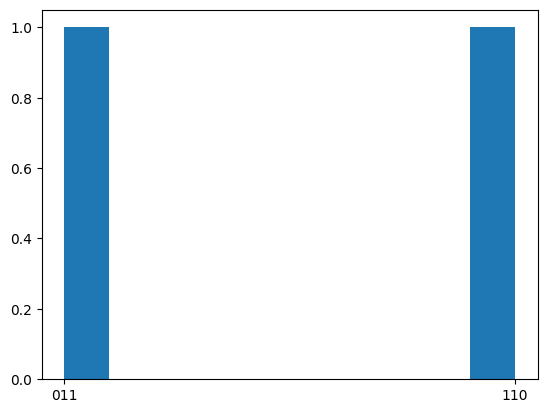

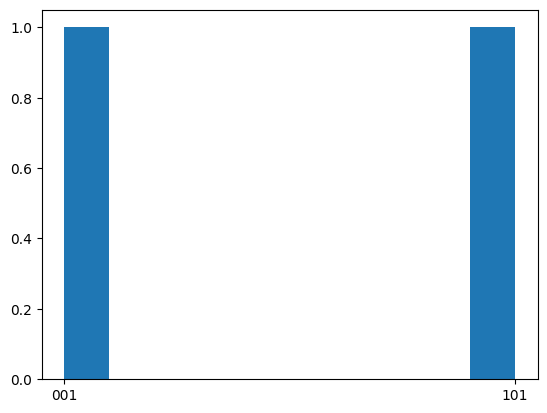

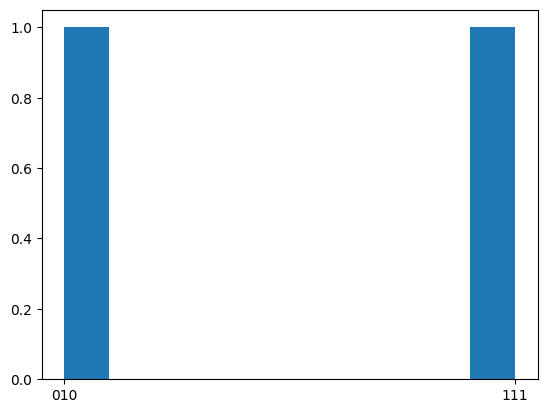

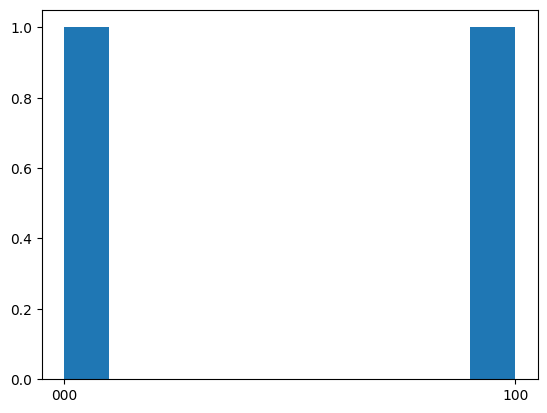

In [9]:
from qiskit.quantum_info import Statevector

state = Statevector.from_instruction(qc)
plt.hist(state.probabilities_dict())
plt.show()
for i in range(4):
    plt.clf()CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())
    
    qc = step(qc)
    state = Statevector.from_instruction(qc)
    plt.hist(state.probabilities_dict())
    plt.show()

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService, Batch, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

# get a real backend from the runtime service
service = QiskitRuntimeService()
backend = service.get_backend('ibm_osaka')
 
# # generate a simulator that mimics the real quantum system with the latest calibration results
# backend_sim = AerSimulator.from_backend(backend)


In [10]:
qc = QuantumCircuit(3, 1)
qc.h(2)
qc.barrier()
state = Statevector.from_instruction(qc)
qc.measure_all()
transpiled_circuit = transpile(qc, backend)
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[transpiled_circuit],
        shots=1000,
    )
    result_sim = job.result()

KeyboardInterrupt: 

In [ ]:
result_sim = service.job('csmqgf1vnxy0008d9q6g').result()
binary_prob = [state.probabilities_dict(), result_sim.quasi_dists[0].binary_probabilities()]
plot_histogram(binary_prob, legend=["Ideal", "Real Device"])

In [11]:
qc = QuantumCircuit(3, 1)
qc.h(2)
qc.barrier()
qc = step(qc)
state = Statevector.from_instruction(qc)
qc.measure_all()
transpiled_circuit = transpile(qc, backend)
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[transpiled_circuit],
        shots=1000,
    )
    result_sim = job.result()


KeyboardInterrupt: 

In [ ]:
result_sim = service.job('csmqhc5vnxy0008d9qcg').result()
binary_prob = [state.probabilities_dict(), result_sim.quasi_dists[0].binary_probabilities()]
plot_histogram(binary_prob, legend=["Ideal", "Real Device"])

In [12]:
qc = QuantumCircuit(3, 1)
qc.h(2)
qc.barrier()
qc = step(qc)
qc = step(qc)
state = Statevector.from_instruction(qc)
qc.measure_all()
transpiled_circuit = transpile(qc, backend)
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[transpiled_circuit],
        shots=1000,
    )
    result_sim = job.result()

KeyboardInterrupt: 

In [ ]:
result_sim = service.job('csmqhxfvnxy0008d9qjg').result()
binary_prob = [state.probabilities_dict(), result_sim.quasi_dists[0].binary_probabilities()]
plot_histogram(binary_prob, legend=["Ideal", "Real Device"])

In [14]:
qc = QuantumCircuit(3, 1)
qc.h(2)
qc.barrier()
qc = step(qc)
qc = step(qc)
qc = step(qc)
state = Statevector.from_instruction(qc)
qc.measure_all()
transpiled_circuit = transpile(qc, backend)
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[transpiled_circuit],
        shots=1000,
    )
    result_sim = job.result()

IBMRuntimeError: 'Failed to run program: \'409 Client Error: Conflict for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"message":"You have reached the limit of 3 pending  jobs. Please wait for a job to complete or cancel one before submitting anything new.","code":3458,"solution":"Wait until some previous jobs were finished. You can cancel pending jobs to run new jobs.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''

In [ ]:
result_sim = service.job('csmqgf1vnxy0008d9q6g').result()
binary_prob = [state.probabilities_dict(), result_sim.quasi_dists[0].binary_probabilities()]
plot_histogram(binary_prob, legend=["Ideal", "Real Device"])